# URDF Friction Implementation / Visualization Practice

In [ ]:
import math

import matplotlib.pyplot as plt
import mpld3
import numpy as np
import pydot
from IPython.display import HTML, SVG, Math, display
from pydrake.all import (AddMultibodyPlantSceneGraph, AddUnitQuaternionConstraintOnPlant, ConstantVectorSource,
                         ControllabilityMatrix, DirectCollocation, DiagramBuilder,
                         FirstOrderTaylorApproximation, Linearize, LogVectorOutput,
                         LinearQuadraticRegulator, MatrixGain,
                         MeshcatVisualizerCpp, MultibodyPlant, Sine, MeshcatVisualizerParams,
                         MultibodyPositionToGeometryPose, Parser, Role,
                         PiecewisePolynomial, PlanarSceneGraphVisualizer, 
                         Saturation, SceneGraph, Simulator, SnoptSolver, StartMeshcat,
                         TrajectorySource, ToLatex, WrapToSystem)
from pydrake.common.containers import namedview
from pydrake.examples.acrobot import (AcrobotGeometry, AcrobotInput,
                                      AcrobotPlant, AcrobotState)
from pydrake.examples.quadrotor import (QuadrotorGeometry, QuadrotorPlant,
                                        StabilizingLQRController)
from pydrake.solvers.mathematicalprogram import MathematicalProgram, Solve

from underactuated import FindResource, running_as_notebook
from underactuated.meshcat_cpp_utils import MeshcatSliders
from underactuated.quadrotor2d import Quadrotor2D, Quadrotor2DVisualizer
from underactuated.jupyter import AdvanceToAndVisualize

if running_as_notebook:
    mpld3.enable_notebook()


In [ ]:
# Start the visualizer (run this cell only once, each instance consumes a port)
meshcat = StartMeshcat()

Meshcat is now available at https://4a1af043-9468-4307-aef7-13beee90031f.deepnoteproject.com


In [ ]:
curr_urdf="""
<?xml version="1.0" ?>
<!-- =================================================================================== -->
<!-- |    This document was autogenerated by xacro from working_snake.urdf.xacro       | -->
<!-- |    EDITING THIS FILE BY HAND IS NOT RECOMMENDED                                 | -->
<!-- =================================================================================== -->
<!-- Import Drake and xacro tools to clean up urdf-->
<robot name="ChooChooSnake" xmlns:drake="http://drake.mit.edu">
  <!-- ######################## BEGIN ASSEMBLING URDF WITH MACROS ######################## -->
  <link name="ground">
    <visual>
      <origin rpy="0 0 0" xyz="0 0 -5"/>
      <geometry>
        <box size="1000 1000 10"/>
      </geometry>
      <material>
        <color rgba="0.93 .74 .4 1"/>
      </material>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0 0 -5"/>
      <geometry>
        <box size="1000 1000 10"/>
      </geometry>
      <material>
        <color rgba="0.93 .74 .4 1"/>
      </material>
      <drake:mu_dynamic value="0.8"/>
      <drake:mu_static value="1.0"/>
    </collision>
  </link>
  <joint name="ground_weld" type="fixed">
    <parent link="world"/>
    <child link="ground"/>
  </joint>
  <!-- Segments -->
  <link name="seg0">
    <inertial>
      <origin xyz="0 0 0.15"/>
      <mass value="5"/>
      <inertia ixx="1.7041666666666666" ixy="0" ixz="0" iyy="0.14166666666666664" iyz="0" izz="1.7708333333333333"/>
    </inertial>
    <visual>
      <origin xyz="0 0 0.15"/>
      <geometry>
        <box size="0.5 2 0.3"/>
      </geometry>
      <material>
        <color rgba="0 1 0 1"/>
      </material>
    </visual>
    <!--
      <collision>
        <xacro:if value="${seg_n == 0}">
          <origin xyz="0 0 ${seg_h/2}" />
        </xacro:if>
        <xacro:if value="${seg_n != 0}">
          <origin xyz="0 ${seg_disp_fac*seg_l/2} 0" />
        </xacro:if>
        <geometry>
          <box size="${0.99*seg_w} ${0.99*seg_l} ${0.99*seg_h}"/>
        </geometry>
        <drake:proximity_properties>
          <drake:mu_dynamic value="${mu}" />
          <drake:mu_static value="${mu_s}" />
        </drake:proximity_properties>
      </collision>
      -->
  </link>
  <link name="seg1">
    <inertial>
      <origin xyz="0 1.75 0"/>
      <mass value="5"/>
      <inertia ixx="1.7041666666666666" ixy="0" ixz="0" iyy="0.14166666666666664" iyz="0" izz="1.7708333333333333"/>
    </inertial>
    <visual>
      <origin xyz="0 1.75 0"/>
      <geometry>
        <box size="0.5 2 0.3"/>
      </geometry>
      <material>
        <color rgba="0 1 0 1"/>
      </material>
    </visual>
    <!--
      <collision>
        <xacro:if value="${seg_n == 0}">
          <origin xyz="0 0 ${seg_h/2}" />
        </xacro:if>
        <xacro:if value="${seg_n != 0}">
          <origin xyz="0 ${seg_disp_fac*seg_l/2} 0" />
        </xacro:if>
        <geometry>
          <box size="${0.99*seg_w} ${0.99*seg_l} ${0.99*seg_h}"/>
        </geometry>
        <drake:proximity_properties>
          <drake:mu_dynamic value="${mu}" />
          <drake:mu_static value="${mu_s}" />
        </drake:proximity_properties>
      </collision>
      -->
  </link>
  <link name="seg2">
    <inertial>
      <origin xyz="0 1.75 0"/>
      <mass value="5"/>
      <inertia ixx="1.7041666666666666" ixy="0" ixz="0" iyy="0.14166666666666664" iyz="0" izz="1.7708333333333333"/>
    </inertial>
    <visual>
      <origin xyz="0 1.75 0"/>
      <geometry>
        <box size="0.5 2 0.3"/>
      </geometry>
      <material>
        <color rgba="0 1 0 1"/>
      </material>
    </visual>
    <!--
      <collision>
        <xacro:if value="${seg_n == 0}">
          <origin xyz="0 0 ${seg_h/2}" />
        </xacro:if>
        <xacro:if value="${seg_n != 0}">
          <origin xyz="0 ${seg_disp_fac*seg_l/2} 0" />
        </xacro:if>
        <geometry>
          <box size="${0.99*seg_w} ${0.99*seg_l} ${0.99*seg_h}"/>
        </geometry>
        <drake:proximity_properties>
          <drake:mu_dynamic value="${mu}" />
          <drake:mu_static value="${mu_s}" />
        </drake:proximity_properties>
      </collision>
      -->
  </link>
  <link name="seg3">
    <inertial>
      <origin xyz="0 1.75 0"/>
      <mass value="5"/>
      <inertia ixx="1.7041666666666666" ixy="0" ixz="0" iyy="0.14166666666666664" iyz="0" izz="1.7708333333333333"/>
    </inertial>
    <visual>
      <origin xyz="0 1.75 0"/>
      <geometry>
        <box size="0.5 2 0.3"/>
      </geometry>
      <material>
        <color rgba="0 1 0 1"/>
      </material>
    </visual>
    <!--
      <collision>
        <xacro:if value="${seg_n == 0}">
          <origin xyz="0 0 ${seg_h/2}" />
        </xacro:if>
        <xacro:if value="${seg_n != 0}">
          <origin xyz="0 ${seg_disp_fac*seg_l/2} 0" />
        </xacro:if>
        <geometry>
          <box size="${0.99*seg_w} ${0.99*seg_l} ${0.99*seg_h}"/>
        </geometry>
        <drake:proximity_properties>
          <drake:mu_dynamic value="${mu}" />
          <drake:mu_static value="${mu_s}" />
        </drake:proximity_properties>
      </collision>
      -->
  </link>
  <!-- Segment Wheels -->
  <link name="flwheel0">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="flw_theta0" type="continuous">
    <parent link="seg0"/>
    <child link="flwheel0"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 -0.95 0.05"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="frwheel0">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="frw_theta0" type="continuous">
    <parent link="seg0"/>
    <child link="frwheel0"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 -0.95 0.05"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="blwheel0">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="blw_theta0" type="continuous">
    <parent link="seg0"/>
    <child link="blwheel0"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 0.95 0.05"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="brwheel0">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="brw_theta0" type="continuous">
    <parent link="seg0"/>
    <child link="brwheel0"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 0.95 0.05"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="flwheel1">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="flw_theta1" type="continuous">
    <parent link="seg1"/>
    <child link="flwheel1"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 0.8 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="frwheel1">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="frw_theta1" type="continuous">
    <parent link="seg1"/>
    <child link="frwheel1"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 0.8 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="blwheel1">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="blw_theta1" type="continuous">
    <parent link="seg1"/>
    <child link="blwheel1"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 2.7 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="brwheel1">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="brw_theta1" type="continuous">
    <parent link="seg1"/>
    <child link="brwheel1"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 2.7 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="flwheel2">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="flw_theta2" type="continuous">
    <parent link="seg2"/>
    <child link="flwheel2"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 0.8 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="frwheel2">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="frw_theta2" type="continuous">
    <parent link="seg2"/>
    <child link="frwheel2"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 0.8 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="blwheel2">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="blw_theta2" type="continuous">
    <parent link="seg2"/>
    <child link="blwheel2"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 2.7 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="brwheel2">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="brw_theta2" type="continuous">
    <parent link="seg2"/>
    <child link="brwheel2"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 2.7 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="flwheel3">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="flw_theta3" type="continuous">
    <parent link="seg3"/>
    <child link="flwheel3"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 0.8 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="frwheel3">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="frw_theta3" type="continuous">
    <parent link="seg3"/>
    <child link="frwheel3"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 0.8 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="blwheel3">
    <inertial>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="blw_theta3" type="continuous">
    <parent link="seg3"/>
    <child link="blwheel3"/>
    <axis xyz="1 0 0"/>
    <origin xyz="0.275 2.7 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <link name="brwheel3">
    <inertial>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <mass value="1"/>
      <inertia ixx="0.0010000000000000002" ixy="0" ixz="0" iyy="0.0010000000000000002" iyz="0" izz="0.0010000000000000002"/>
    </inertial>
    <visual>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <box size="0.1 0.1 0.1"/>
        <color rgba="0 1 0 1"/>
      </geometry>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.05 0 0"/>
      <geometry>
        <sphere radius="0.05"/>
      </geometry>
      <drake:proximity_properties>
        <drake:mu_dynamic value="0.8"/>
        <drake:mu_static value="1.0"/>
      </drake:proximity_properties>
    </collision>
  </link>
  <joint name="brw_theta3" type="continuous">
    <parent link="seg3"/>
    <child link="brwheel3"/>
    <axis xyz="1 0 0"/>
    <origin xyz="-0.275 2.7 -0.09999999999999999"/>
    <limit effort="1" velocity="10"/>
  </joint>
  <!-- Segment Joints / Actuators -->
  <joint name="theta0" type="revolute">
    <parent link="seg0"/>
    <child link="seg1"/>
    <axis xyz="0 0 1"/>
    <origin xyz="0 1.375 0.15"/>
    <limit effort="150" lower="-1" upper="1" velocity="10"/>
  </joint>
  <joint name="theta1" type="revolute">
    <parent link="seg1"/>
    <child link="seg2"/>
    <axis xyz="0 0 1"/>
    <origin xyz="0 3.125 0"/>
    <limit effort="150" lower="-1" upper="1" velocity="10"/>
  </joint>
  <joint name="theta2" type="revolute">
    <parent link="seg2"/>
    <child link="seg3"/>
    <axis xyz="0 0 1"/>
    <origin xyz="0 3.125 0"/>
    <limit effort="150" lower="-1" upper="1" velocity="10"/>
  </joint>
  <transmission name="segj1Force" type="SimpleTransmission">
    <actuator name="force1"/>
    <joint name="theta0"/>
    <mechanicalReduction>1</mechanicalReduction>
  </transmission>
  <transmission name="segj2Force" type="SimpleTransmission">
    <actuator name="force2"/>
    <joint name="theta1"/>
    <mechanicalReduction>1</mechanicalReduction>
  </transmission>
  <transmission name="segj3Force" type="SimpleTransmission">
    <actuator name="force3"/>
    <joint name="theta2"/>
    <mechanicalReduction>1</mechanicalReduction>
  </transmission>
  <!--

  <xacro:segw_trans row="f" side="l" seg_n="0" />

  <xacro:segw_trans row="f" side="r" seg_n="0" />

  -->
  <!--
  <drake:joint name="floating_base" type="planar">
    <parent link="world" />
    <child link="seg0" />
    <origin rpy="0 0 0" xyz="0 0 ${seg_h/2}" />
  </drake:joint>
  -->
</robot>

"""

In [ ]:
# Hyperparams
duration = 3
num_iterations = 1e4

plant_time_step = 0.1
dircol_time_samples = 21
dircol_min_timestep = 0.1
dircol_max_timestep = 0.4

<pydrake.systems.framework.LeafOutputPort_[float] object at 0x7fc0668b47f0> <pydrake.systems.framework.LeafOutputPort_[float] object at 0x7fc06657e130>
26 25


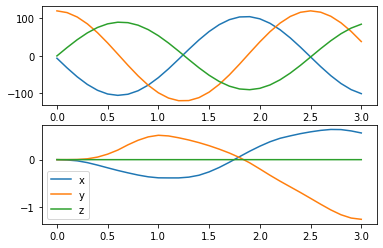

In [ ]:
def visualize_demo():
    builder = DiagramBuilder()
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=plant_time_step)
    Parser(plant).AddModelFromString(curr_urdf, "urdf")
    plant.Finalize()
    context = plant.CreateDefaultContext()

    # amps = np.array([120.0,150.0,120.0])
    # freqs = np.array([3,6,3])
    # phases = np.array([0,1.3,2.6])

    amps = np.array([105,120.0,90.0])
    freqs = np.array([2.5,2.5,2.5])
    phases = np.array([3.2,1.6,0])
    # amps = np.array([1000.0,1000.0,1000.0])
    # freqs = np.array([10,10,10])
    # phases = np.array([1.0,1.2,1.4])

    amp = 1000
    freq = 10
    phase = 0
    # command = builder.AddSystem(ConstantVectorSource([-100, 100, -100]))
    command = builder.AddSystem(Sine(amps, freqs, phases))


    builder.Connect(command.get_output_port(0), plant.get_actuation_input_port())
    print(command.get_output_port(0), plant.get_output_port(0))
    input_logger = LogVectorOutput(command.get_output_port(0), builder, publish_period=plant_time_step)
    state_logger = LogVectorOutput(plant.get_output_port(1), builder, publish_period=plant_time_step)
    # builder.Connect(command.get_output_port(1), plant.get_actuation_input_port())

    meshcat.Delete()
    meshcat.ResetRenderMode()
    MeshcatVisualizerCpp.AddToBuilder(builder, scene_graph, meshcat,MeshcatVisualizerParams(role=Role.kPerception, prefix="visual"))
    diagram = builder.Build()
    simulator = Simulator(diagram)

    print(plant.num_positions(),plant.num_velocities())
    test= np.zeros(51)
    
    State = namedview("State", [
        "quat", "xrot", "yrot", "zrot", 
        "xseg0", "yseg0", "zseg0", 
        "flw_theta0", "frw_theta0", "blw_theta0", "brw_theta0",
        "theta0", 
        "flw_theta1", "frw_theta1", "blw_theta1", "brw_theta1", 
        "theta1", 
        "flw_theta2", "frw_theta2", "blw_theta2", "brw_theta2",
        "theta2", 
        "flw_theta3", "frw_theta3", "blw_theta3", "brw_theta3",
        "xrotdot", "yrotdot", "zrotdot",
        "xseg0dot", "yseg0dot", "zseg0dot", 
        "flw_theta0dot", "frw_theta0dot", "blw_theta0dot", "brw_theta0dot", 
        "theta0dot",
        "flw_theta1dot", "frw_theta1dot", "blw_theta1dot", "brw_theta1dot",  
        "theta1dot",
        "flw_theta2dot", "frw_theta2dot", "blw_theta2dot", "brw_theta2dot",
        "theta2dot",
        "flw_theta3dot", "frw_theta3dot", "blw_theta3dot", "brw_theta3dot",
    ])
    test[0] = 1
    test[1] = 0
    test[2] = 0
    test[3] = 0
    # test[11] = .5
    # test[16] = -1
    # test[21] = 1
    # test[32] = 10
    # test[33] = 10
    x0 = State(test)
    context = simulator.get_mutable_context() 
    plant_context = plant.GetMyContextFromRoot(context)
    plant.SetPositionsAndVelocities(plant_context, x0[:])
    simulator.set_target_realtime_rate(.5)
    simulator.AdvanceTo(duration)





    fig, ax = plt.subplots(2,1)
    input_log = input_logger.FindLog(simulator.get_context())
    state_log = state_logger.FindLog(simulator.get_context())
    ax[0].plot(input_log.sample_times(), input_log.data().T)
    ax[1].plot(state_log.sample_times(), state_log.data()[4:7].T)
    ax[1].legend(('x','y','z'))
    return input_log, state_log
input_log, state_log = visualize_demo()


In [ ]:
def trajopt():
    # def callback_visualization(t,x,u,v):
    #     fig, axes = plt.subplots(2)
    #     axes[0].plot(t,u.T)
    #     axes[0].legend(('u'))
    #     axes[1].plot(t,x[1:4].T)
    #     axes[1].legend(('x','y','z'))
    
    builder = DiagramBuilder()
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=0.0)
    Parser(plant).AddModelFromString(curr_urdf, "urdf")
    plant.Finalize()
    input_port = builder.ExportInput(plant.get_actuation_input_port(), "input")
    diagram = builder.Build()
    context = diagram.CreateDefaultContext()
    # display(SVG(pydot.graph_from_dot_data(diagram.GetGraphvizString())[0].create_svg()))

    dircol = DirectCollocation(
        diagram,
        context,
        num_time_samples=dircol_time_samples,
        minimum_timestep=dircol_min_timestep,
        maximum_timestep=dircol_max_timestep,
        input_port_index=input_port)
    prog = dircol.prog()
    # dircol.AddCompleteTrajectoryCallback(callback=callback_visualization,
    #                                          names=[])


    # dircol.AddEqualTimeIntervalsConstraints()
    initial_state = np.zeros(51)
    initial_state[0] = 1
    for t in range(dircol_time_samples):
        AddUnitQuaternionConstraintOnPlant(plant,dircol.state(t)[:plant.num_positions()],prog)
    prog.AddBoundingBoxConstraint(initial_state, initial_state,
                                  dircol.initial_state())
    dircol.AddRunningCost(dircol.state()[5])


    num_samples = len(state_log.data().T)
    polynomial_duration = max(dircol_max_timestep*dircol_time_samples, duration)
    initial_u = PiecewisePolynomial.ZeroOrderHold(np.linspace(0,polynomial_duration, num_samples), input_log.data())
    initial_x = PiecewisePolynomial().ZeroOrderHold(np.linspace(0,polynomial_duration, num_samples), state_log.data())
    dircol.SetInitialTrajectory(initial_u, initial_x)
    snopt = SnoptSolver().solver_id()
    prog.SetSolverOption(snopt, 'Iterations Limits', num_iterations if running_as_notebook else 1)
    result = Solve(prog)

    print(result.get_solver_details().info)
    print(prog.GetAllCosts())
    print(result.is_success())


    u_trajectory = dircol.ReconstructInputTrajectory(result)

    # Animate the results.
    x_trajectory = dircol.ReconstructStateTrajectory(result)
    return u_trajectory, x_trajectory

u_trajectory, x_trajectory = trajopt()

44
[<pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc0665208f0>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc066520030>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc066520cf0>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc066520df0>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc066520430>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc066520fb0>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc066520730>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc0665200b0>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc066520530>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc066520a30>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc066520230>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at 0x7fc066520eb0>, <pydrake.solvers.mathematicalprogram.Binding[Cost] object at

In [ ]:
def play_trajectory(u_trajectory, x_trajectory):
    fig, axes = plt.subplots(2)
    trajectory_duration = u_trajectory.end_time()
    samples = np.linspace(0,trajectory_duration,100)
    u_values = u_trajectory.vector_values(samples)
    x_values = x_trajectory.vector_values(samples)
    axes[0].plot(samples,u_values.T)
    axes[0].legend(('u'))
    axes[1].plot(samples,x_values[4:7].T)
    axes[1].legend(('x','y','z'))

    plant = MultibodyPlant(time_step=0.0)
    scene_graph = SceneGraph()
    plant.RegisterAsSourceForSceneGraph(scene_graph)
    Parser(plant).AddModelFromString(curr_urdf, "urdf")
    plant.Finalize()

    # TODO(russt): Add some helper methods to make this workflow cleaner.
    builder = DiagramBuilder()
    source = builder.AddSystem(TrajectorySource(x_trajectory))
    builder.AddSystem(scene_graph)
    pos_to_pose = builder.AddSystem(
        MultibodyPositionToGeometryPose(plant, input_multibody_state=True))
    builder.Connect(source.get_output_port(0), pos_to_pose.get_input_port())
    builder.Connect(pos_to_pose.get_output_port(),
                    scene_graph.get_source_pose_port(plant.get_source_id()))

    meshcat.Delete()
    meshcat.ResetRenderMode()
    MeshcatVisualizerCpp.AddToBuilder(builder, scene_graph,meshcat)

    diagram = builder.Build()

    # Set up a simulator to run this diagram
    simulator = Simulator(diagram)
    context = simulator.get_mutable_context()

    # Simulate
    simulator.set_target_realtime_rate(1.0 if running_as_notebook else 0.0)
    simulator.AdvanceTo(trajectory_duration if running_as_notebook else 0.1)

    initial_y_dist = state_log.data()[5,-1]
    optimized_y_dist = x_trajectory.value(x_trajectory.end_time())[5]
    return (optimized_y_dist-initial_y_dist)/(optimized_y_dist)

print('Percent Improvement:',play_trajectory(u_trajectory, x_trajectory))

NameError: name 'u_trajectory' is not defined

## Problem Description
In this problem you will work on the cart-pole system described in [Section 3.2 of the textbook](http://underactuated.csail.mit.edu/acrobot.html#cart_pole).
You will be asked to write down its dynamics in state-space form, linearize the system, and then analyze the linearization error.
At the end we will wire up an LQR controller and simulate the cart-pole in a series of balancing tasks.

## Dynamics in State-Space Form
Consider the cart-pole system described in [Section 3.2 of the textbook](http://underactuated.csail.mit.edu/acrobot.html#cart_pole).

For the sake of simplicity, in this notebook we fix the following numeric values for its parameters:
- mass of the cart $m_{\text{c}}=1$,
- mass of the pole $m_{\text{p}}=1$,
- length of the pole $l=1$,
- gravity acceleration $g=9.81$.

**Important:** Do not modify/round these parameters, otherwise the autograding code will raise an error.

Using the same convention as the book, we describe the state of the cart-pole as the vector $\mathbf{x} = [x, \theta, \dot{x}, \dot{\theta}]^T$, and we let the force on the cart be the control input $\mathbf{u} = [f_x]$.

Use [equations (16) and (17)](http://underactuated.csail.mit.edu/acrobot.html#cart_pole) from the textbook for the accelerations:

$$\ddot{x} = \frac{1}{m_c + m_p \sin^2\theta}[ f_x+m_p \sin\theta (l \dot\theta^2 + g\cos\theta)]$$

$$\ddot{\theta} = \frac{1}{l(m_c + m_p \sin^2\theta)}[ -f_x \cos\theta - m_p l \dot\theta^2 \cos\theta \sin\theta - (m_c + m_p) g \sin\theta]$$

Complete the state-space model of the cart-pole by implementing the vector $\dot{\mathbf{x}} = [\dot{x}, \dot{\theta}, \ddot{x}, \ddot{\theta}]^T$ as $\dot{\mathbf{x}} = {\bf f}(\mathbf{x}, \mathbf{u})$. Implement the function ${\bf f}$ below to return $\dot{\mathbf{x}}$.

(Note: you will not need to perform any derivations, simply implement the function ${\bf f}$ as defined above considering the inputs $\mathbf{x}$ and $\mathbf{u}$ and the constant parameters of the system)

In [ ]:
# function that given the cart-pole state x (4d array)
# and the input u (1d array) returns the right
# hand side of the state space dynamics h(x,u)
# (remember that we fixed the cart-pole parameters
# to the values above!)
def f(x, u):

    # shortcuts for the cosine and the sine of theta
    # they might be handy
    c = np.cos(x[1])
    s = np.sin(x[1])

    # gravity acceleration
    g = 9.81 # do not change

    # fill the following matrix
    # (sorry for the one-base counting!)
    f1 = 0 # modify here
    f2 = 0 # modify here
    f3 = 0 # modify here
    f4 = 0 # modify here

    return np.array([f1, f2, f3, f4])

## Dynamics Linearized Around the Unstable Equilibrium
We will now approximate the nonlinear dynamics with a linear one.
This will allow us to use basic linear control to locally stabilize the cart-pole with the pole in the vertical configuration.

We consider the unstable equilibrium state $$\mathbf{x}^* = [0, \pi, 0, 0]^T,$$ with the related equilibrium control input $$\mathbf{u}^* = [0].$$
As in [Section 3.4.1](http://underactuated.csail.mit.edu/acrobot.html#section4), we want to derive a linear model in the from
$$\dot{\bar{\mathbf{x}}} = A_{\text{lin}} \mathbf{\bar{x}} + B_{\text{lin}} \mathbf{\bar{u}},$$
where $\mathbf{\bar{x}} = \mathbf{x}-\mathbf{x}^*$ and $\mathbf{\bar{u}} = \mathbf{u} -\mathbf{u}^*$.

Follow the recipe described in [Section 3.4.1 of the textbook](http://underactuated.csail.mit.edu/acrobot.html#section4) to derive the linearization matrices $A_{\text{lin}}$ and $B_{\text{lin}}$, and implement them in the cell below. You will need to do some simple matrix math to derive the components. [Example 3.2](http://underactuated.csail.mit.edu/acrobot.html#example2) may be a helpful reference for this derivation.

Hint: Many of our parameters are constants set to 1, which simplifies the terms in the manipulator equations substantially.

In [ ]:
# function that returns the A_lin matrix
def get_A_lin():
    g = 9.81 # do not change
    # fill the matrix below
    A = np.array([
        [0, 0, 0, 0], # modify here
        [0, 0, 0, 0], # modify here
        [0, 0, 0, 0], # modify here
        [0, 0, 0, 0]  # modify here
    ])
    return A

# function that returns the B_lin matrix
def get_B_lin():
    # fill the matrix below
    B = np.array([
        [0], # modify here
        [0], # modify here
        [0], # modify here
        [0]  # modify here
    ])
    return B

## Linearization Error
The linear model we have built above is very accurate accurate in the vicinity of the equilibrium point, but can lead to very bad predictions if our state is far away from the equilibrium.

The following function, for a given state $\mathbf{x}$ and control $\mathbf{u}$, evaluates the linearization error:
$$e(\mathbf{x}, \mathbf{u}) = \| {\bf f}(\mathbf{x}, \mathbf{u}) - {\bf f_{\text{lin}}}(\mathbf{x}, \mathbf{u}) \|$$
where we defined ${\bf f_{\text{lin}}}(\mathbf{x}, \mathbf{u}) = A_{\text{lin}} \mathbf{\bar{x}} + B_{\text{lin}} \mathbf{\bar{u}}.$

In [ ]:
def f_lin(x,u):

    # equilibrium point
    x_star = np.array([0, np.pi, 0, 0])
    u_star = np.array([0])

    # linearized dynamics
    x_bar = x - x_star
    u_bar = u - u_star
    A = get_A_lin()
    B = get_B_lin()

    return A.dot(x_bar) + B.dot(u_bar)

def linearization_error(x, u):
    return np.linalg.norm(f(x,u) - f_lin(x,u))

Use the function above to evaluate the error $e(\mathbf{x}, \mathbf{u})$ in the following 6 conditions:
- $\mathbf{x} = [0, 0.99 \pi, 0, 0]^T$ and $\mathbf{u} = [0]$,
- $\mathbf{x} = [0, 0.9 \pi, 0, 0]^T$ and $\mathbf{u} = [-10]$,
- $\mathbf{x} = [0, 0.85 \pi, 0, 0]^T$ and $\mathbf{u} = [0]$,
- $\mathbf{x} = [0, 0.5 \pi, 0, 0]^T$ and $\mathbf{u} = [0]$,
- $\mathbf{x} = [0, 0, 0, 0]^T$ and $\mathbf{u} = [0]$,
- $\mathbf{x} = [1, \pi, 0, 0]^T$ and $\mathbf{u} = [10]$,

**Attention 1:** For the number $\pi$ use `np.pi`! **Do not** truncate it like $3.14$.

In [ ]:
# fill these states with the ones given above
x_list = [
    np.array([0, np.pi, 0, 0]), # modify here
    np.array([0, np.pi, 0, 0]), # modify here
    np.array([0, np.pi, 0, 0]), # modify here
    np.array([0, np.pi, 0, 0]), # modify here
    np.array([0, np.pi, 0, 0]), # modify here
    np.array([0, np.pi, 0, 0])  # modify here
]

# fill these inputs with the ones given above
u_list = [
    np.array([0]), # modify here
    np.array([0]), # modify here
    np.array([0]), # modify here
    np.array([0]), # modify here
    np.array([0]), # modify here
    np.array([0])  # modify here
]

# compute linearization errors for all the points above
errors = [linearization_error(x_list[i], u_list[i]) for i in range(6)]

Below we compare these linearization errors with the norm of $\dot{\mathbf{x}}$, i.e.,
$
\| {\bf f}(\mathbf{x}, \mathbf{u})\|$

Clearly, the smaller the linearization error with respect to this value, the better is our linear model.

Spend some time to convince yourself about this result.
Try to answer the following questions:
- Is our linear approximation valid for all the points we tested?
- Do we expect a linear controller to do a decent job when $\theta = \pi/2$?
- When $\theta$ is different from zero, does the linearization error depend on $\mathbf{u}$?
- Why is the error from the second case bigger than the one from the third, even if the second $\theta$ is closer to $\pi$ than the third?
- What about the position $x$ of the cart? Should it affect the linearization error? If no, why not?

(Questions not graded, do not submit.)

In [ ]:
for i, e in enumerate(errors):
    print(f'State = {np.around(x_list[i], decimals=3)}^T')
    print(f'Input = {np.around(u_list[i], decimals=3)}')
    print('Linearization error = {:.3f}'.format(e))
    print('Norm of f(x,u) = {:.3f}\n'.format(np.linalg.norm(f(x_list[i], u_list[i]))))

State = [0.    3.142 0.    0.   ]^T
Input = [0]
Linearization error = 0.000
Norm of f(x,u) = 0.000

State = [0.    3.142 0.    0.   ]^T
Input = [0]
Linearization error = 0.000
Norm of f(x,u) = 0.000

State = [0.    3.142 0.    0.   ]^T
Input = [0]
Linearization error = 0.000
Norm of f(x,u) = 0.000

State = [0.    3.142 0.    0.   ]^T
Input = [0]
Linearization error = 0.000
Norm of f(x,u) = 0.000

State = [0.    3.142 0.    0.   ]^T
Input = [0]
Linearization error = 0.000
Norm of f(x,u) = 0.000

State = [0.    3.142 0.    0.   ]^T
Input = [0]
Linearization error = 0.000
Norm of f(x,u) = 0.000



## Balancing with LQR Controller
We finally move to the design of the LQR controller.
Drake handles all the linearization process very transparently: no need to get your hands dirty with all the linearization issues we discussed above!
But it was worth to do it by hand at least once...

Drake can design an LQR controller directly on the nonlinear system obtained by parsing the `.urdf` file!

First we set a couple of numeric parameters.

In [ ]:
# unstable equilibrium point
x_star = [0, np.pi, 0, 0]

# weight matrices for the lqr controller
Q = np.eye(4)
R = np.eye(1)

Then we construct the block diagram with the cart-pole in closed loop with the LQR controller.

In [ ]:
# start construction site of our block diagram
builder = DiagramBuilder()

# instantiate the cart-pole and the scene graph
cartpole, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=0.0)
urdf_path = FindResource('models/undamped_cartpole.urdf')
Parser(cartpole).AddModelFromFile(urdf_path)
cartpole.Finalize()

# set the operating point (vertical unstable equilibrium)
context = cartpole.CreateDefaultContext()
context.get_mutable_continuous_state_vector().SetFromVector(x_star)

# fix the input port to zero and get its index for the lqr function
cartpole.get_actuation_input_port().FixValue(context, [0])
input_i = cartpole.get_actuation_input_port().get_index()

# synthesize lqr controller directly from
# the nonlinear system and the operating point
lqr = LinearQuadraticRegulator(cartpole, context, Q, R, input_port_index=int(input_i))
lqr = builder.AddSystem(lqr)

# the following two lines are not needed here...
output_i = cartpole.get_state_output_port().get_index()
cartpole_lin = Linearize(cartpole, context, input_port_index=input_i, output_port_index=output_i)

# wire cart-pole and lqr
builder.Connect(cartpole.get_state_output_port(), lqr.get_input_port(0))
builder.Connect(lqr.get_output_port(0), cartpole.get_actuation_input_port())

# add a visualizer and wire it
visualizer = builder.AddSystem(
    PlanarSceneGraphVisualizer(scene_graph, xlim=[-3., 3.], ylim=[-1.2, 1.2], show=False)
)
builder.Connect(scene_graph.get_query_output_port(), visualizer.get_input_port(0))

# finish building the block diagram
diagram = builder.Build()

# instantiate a simulator
simulator = Simulator(diagram)
simulator.set_publish_every_time_step(False) # makes sim faster

The following cell contains a function that simulates the closed-loop system and produces a video of the sim.

In [ ]:
# function that given the cart-pole initial state
# and the simulation time, simulates the system
# and produces a video
def simulate_and_animate(x0, sim_time=5):

    # start recording the video for the animation of the simulation
    visualizer.start_recording()

    # reset initial time and state
    context = simulator.get_mutable_context()
    context.SetTime(0.)
    context.SetContinuousState(x0)

    # run sim
    simulator.Initialize()
    simulator.AdvanceTo(sim_time)

    # stop video
    visualizer.stop_recording()

    # construct animation
    ani = visualizer.get_recording_as_animation()

    # display animation below the cell
    display(HTML(ani.to_jshtml()))

    # reset to empty video
    visualizer.reset_recording()

Now we just run the function we just wrote for all the initial states we analyzed in this notebook, and we look at the result!

In [ ]:
# simulate and animate the cart
for x in x_list:
    simulate_and_animate(x)

Was your intuition from the previous analysis correct?
Out of the 6 initial states we considered, which are the states from which the LQR controller is able to recover? (Questions not graded, do not submit.)

In the next cell, write (in base zero) the indices of the states from which the system is able to recover (autograded).

In [ ]:
system_recovers_from_states = [] # modify here
print('System recovers from states:')
for i in system_recovers_from_states:
    print(np.around(x_list[i], decimals=2))

System recovers from states:


## A Final Note
In the middle of the construction of the block diagram above, we have hidden the system `cartpole_lin`.
It has been defined using `Linearize`.
This is the function that `LinearQuadraticRegulator` uses to linearize the plant before solving the Riccati equation.
Feel free to use the methods `cartpole_lin.A()` and `cartpole_lin.B()` to double check your answer above!

## Autograding
You can check your work by running the following cell:

In [ ]:
from underactuated.exercises.acrobot.cartpole_balancing.test_cartpole_balancing import TestCartPoleBalancing
from underactuated.exercises.grader import Grader
Grader.grade_output([TestCartPoleBalancing], [locals()], 'results.json')
Grader.print_test_results('results.json')

Total score is 0/13.

Score for Test state space dynamics is 0/4.
- Test Failed: 58.75930738589505 not less than or equal to 1e-05 : The state space dynamics f(x,u) are not correct.


Score for Test linearization matrix A is 0/2.
- Test Failed: 21.98136710944067 not less than or equal to 1e-08 : incorrect A linearization


Score for Test linearization matrix B is 0/2.
- Test Failed: 1.4142135623730951 not less than or equal to 1e-08 : incorrect B linearization


Score for Test x_list and u_list content is 0/1.
- Test Failed: 3.6957752373266977 not less than or equal to 1e-07 : Incorrect x_list.


Score for Test linearization errors is 0/2.
- Test Failed: 1e-05 not less than or equal to 0.0 : Some linearization errors are too low


Score for Test for which the system is able to recover is 0/2.
- Test Failed: elementwise comparison failed; this will raise an error in the future.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a1af043-9468-4307-aef7-13beee90031f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>